Importing Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_dataset = pd.read_csv("F:\Projects\ML projects\Copy project\Car Price Prediction\cardekho.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\saksh\AppData\Local\Temp\ipykernel_13908\366550095.py:1: SyntaxWarning: invalid escape sequence '\P'
  car_dataset = pd.read_csv("F:\Projects\ML projects\Copy project\Car Price Prediction\cardekho.csv")


In [4]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
car_dataset.shape

(8128, 12)

In [6]:
car_dataset.describe

<bound method NDFrame.describe of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission

In [7]:
# checking for missing value
car_dataset.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
# Replacing null data with empty string
car_dataset = car_dataset.fillna(0)
car_dataset = car_dataset.replace(' ',0)

In [9]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1, 'LPG':2, 'CNG':3},'seller_type':{'Individual':1, 'Dealer':0,'Trustmark Dealer':2}, 'transmission':{'Manual':0, 'Automatic':1}, 'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_13908\3396431783.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1, 'LPG':2, 'CNG':3},'seller_type':{'Individual':1, 'Dealer':0,'Trustmark Dealer':2}, 'transmission':{'Manual':0, 'Automatic':1}, 'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)


In [10]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0,16.10,1298.0,88.2,5.0


In [11]:
# Spliting Data and Label
x = car_dataset.drop(['name','selling_price'], axis=1)
y= car_dataset['selling_price']

In [12]:
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,145500,1,1,0,0,23.40,1248.0,74,5.0
1,2014,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,0,1,0,2,17.70,1497.0,78,5.0
3,2010,127000,1,1,0,0,23.00,1396.0,90,5.0
4,2007,120000,0,1,0,0,16.10,1298.0,88.2,5.0


In [13]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [14]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [15]:
# Training the model
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
# predicting model
x_train_prediction = model.predict(x_train)
error_score = metrics.r2_score(y_train ,x_train_prediction)

print("Error Score : ",error_score)

Error Score :  0.6703433437879533


Visualize the actual prices and predictive prices

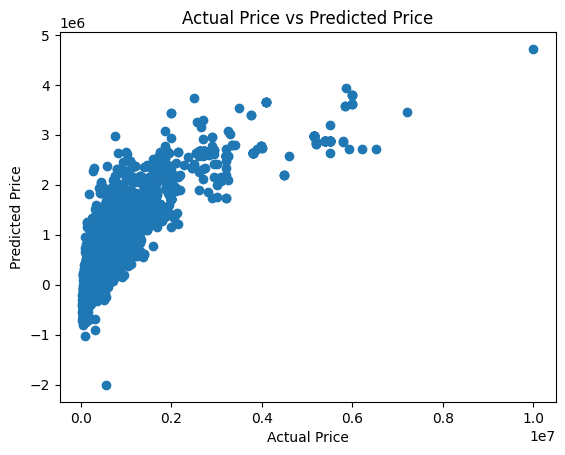

In [18]:
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [20]:
# prediction on test data
test_data_prediction = model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error', error_score)

R squared error 0.6668269926983562


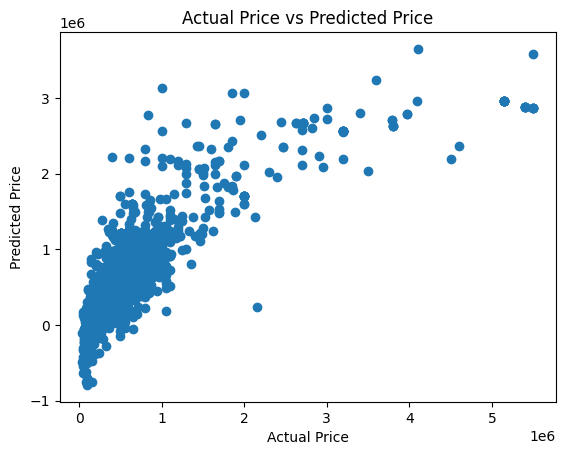

In [21]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Lasso Regression

In [22]:
lass_model = Lasso()
lass_model.fit(x_train, y_train)

Lasso()

In [24]:
# Model Evaluation
training_data_prediction = lass_model.predict(x_train)
# rsqared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R2 : ", error_score)

R2 :  0.6703433437523527


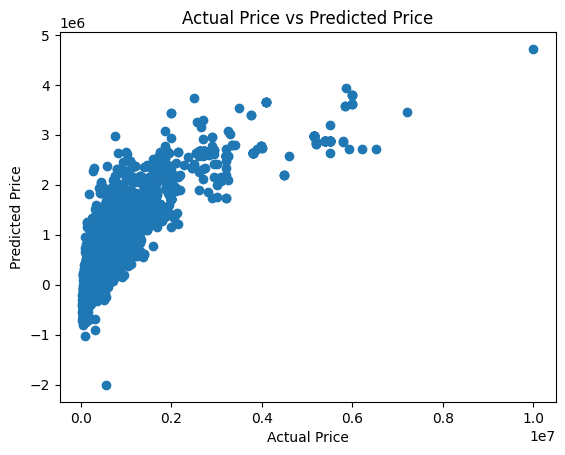

In [28]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

R2 :  0.6668270789357107


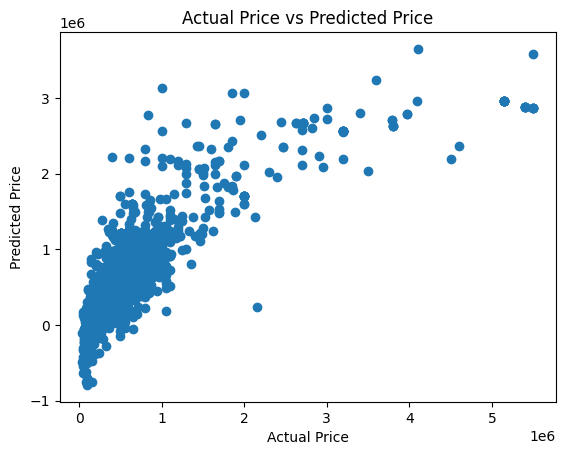

In [27]:
# Model Evaluation on test data
test_data_prediction = lass_model.predict(x_test)
# rsqared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R2 : ", error_score)

plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()